In [1]:
# Importamos librerias.
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt


In [2]:
X_train = pd.read_csv("./data_processed/X_train.csv", index_col=None, encoding='utf-8')
y_train = pd.read_csv("./data_processed/y_train.csv", index_col=None, encoding='utf-8')

X_test = pd.read_csv("./data_processed/X_test.csv", index_col=None, encoding='utf-8')
y_test = pd.read_csv("./data_processed/y_test.csv", index_col=None, encoding='utf-8')

print('Datos de entrenamiento:')
print(X_train.shape)
print(y_train.shape)
print('Datos de prueba:')
print(X_test.shape)
print(y_test.shape)

Datos de entrenamiento:
(5482, 6358)
(5482, 1)
Datos de prueba:
(1371, 6358)
(1371, 1)


In [3]:
X_train.head(5)

,0,1,2,3,4,5,6,7,8,9,...,6348,6349,6350,6351,6352,6353,6354,Negatives,Neutrals,Positives
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.115,0.885,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1.000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1.000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.355,0.645,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1.000,0.0


In [4]:
X_test.head(5)

,0,1,2,3,4,5,6,7,8,9,...,6348,6349,6350,6351,6352,6353,6354,Negatives,Neutrals,Positives
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000,1.000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.274752,0.047,0.953,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000,1.000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000,1.000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000,1.000,0.0


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fc1ef2a7520>
Traceback (most recent call last):
  File "/home/bruno-rg/anaconda3/envs/nlp/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/bruno-rg/anaconda3/envs/nlp/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/bruno-rg/anaconda3/envs/nlp/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/bruno-rg/anaconda3/envs/nlp/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo

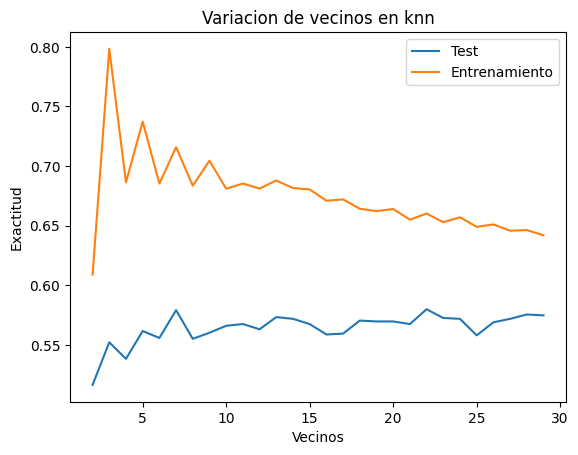

In [5]:
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# Buscando el numero de K (vecinos) optimo. 
vecinos = np.arange(2,30)
train_acuracy = np.empty(len(vecinos))
test_acuracy = np.empty(len(vecinos))
for i, k in enumerate(vecinos):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,y_train)
  train_acuracy[i] =knn.score(X_train, y_train)
  test_acuracy[i] =knn.score(X_test, y_test)

plt.title('Variacion de vecinos en knn')
plt.plot(vecinos, test_acuracy,label="Test")
plt.plot(vecinos,train_acuracy,label="Entrenamiento")
plt.legend()
plt.xlabel("Vecinos")
plt.ylabel("Exactitud")
plt.show()